<a href="https://colab.research.google.com/github/Jayvish80/Amazon-Delivery-Time-Prediction/blob/main/Amazon_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon Delivery Time Prediction



##### **Project Type**    - Python scripting, data cleaning, Exploratory Data Analysis (EDA), Machine Learning,Regression modeling,MLflow, Streamlit

Name - Jay Vishwakarma

# **Project Summary -**

*   The project **“Amazon Delivery Time Prediction”** focuses on developing a machine learning–based system to estimate delivery times for e-commerce orders by leveraging customer, agent, and environmental data. In the fast-growing e-commerce sector, accurate delivery time predictions are critical for enhancing customer satisfaction, optimizing logistics, and ensuring efficient resource allocation. This project integrates data science, regression modeling, and application development to address these challenges while offering practical skills in Python, data cleaning, exploratory analysis, model development, and deployment.

*   From a **business perspective**, the project carries several key use cases. First, it enables **enhanced delivery logistics** by forecasting delivery schedules more accurately, directly improving customer trust and retention. It also allows for **dynamic adjustments** in delivery predictions by accounting for real-time factors like traffic congestion and adverse weather. Additionally, it supports **agent performance evaluation**, helping identify training needs and recognizing efficient workers. Finally, it boosts **operational efficiency** by uncovering trends that inform better allocation of vehicles, workforce, and other resources.

*   The **approach** is structured into multiple phases. The project begins with **data preparation**, where raw data is cleaned, missing values are handled, and categorical variables are standardized. **Feature engineering** plays a central role by introducing new attributes such as geospatial distance between store and customer locations and extracting temporal features like order hour or day of the week. **Exploratory Data Analysis (EDA)** further explores relationships within the dataset, examining the influence of traffic, weather, distance, and agent performance on delivery outcomes. Visualizations such as bar charts, scatter plots, and heatmaps provide deeper insights into trends and correlations.

*   In conclusion, this project blends data science with real-world e-commerce logistics, equipping learners with technical expertise while addressing an industry-relevant challenge. By following this structured workflow, the system delivers not only accurate delivery time predictions but also meaningful insights into logistics optimization, making it a valuable tool for modern e-commerce operations.

# **GitHub Link -**

https://github.com/Jayvish80/Amazon-Delivery-Time-Prediction.git

# **Problem Statement**


This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import streamlit as st
import joblib
import shap
import os

from math import radians, cos, sin, asin, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from mlflow.models.signature import infer_signature
from pyngrok import ngrok

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Mount Google Drive (if file is stored there)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Amazon Delivery Time Prediction/amazon_delivery.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(df.shape)

(43739, 16)


### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
print(df.columns)

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')


In [9]:
# Dataset Describe
print(df.describe())

          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43685.000000    43739.000000     43739.000000   
mean      29.567137      4.633780       17.210960        70.661177   
std        5.815155      0.334716        7.764225        21.475005   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count   43739.000000    43739.000000   43739.000000  
mean       17.459031       70.821842     124.905645  
std         7.342950       21.153148      51.915451  
min         0.010000        0.010000      10.000000  
25%        12.985996       73.280000      90.000000  
50%        18.633626       76.002574     125.

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
print(df.nunique())

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64


## **3. DATA CLEANING**

In [11]:
# Handle Missing Data (Numeric)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Handle Missing Data (Categorical)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Standardize Categorical Labels
def standardize_text(s):
    if isinstance(s, str):
        return s.strip().lower()
    return s

for col in ['Weather', 'Traffic', 'Area']:
    if col in df.columns:
        df[col] = df[col].apply(standardize_text)

# Verify Cleaning
print("Shape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())
print("Unique values in categorical columns:")
for col in ['Weather', 'Traffic', 'Area']:
    if col in df.columns:
        print(f"{col}:", df[col].unique())

# Save Cleaned Dataset
df.to_csv("/content/drive/MyDrive/Amazon Delivery Time Prediction/amazon_delivery_cleaned.csv", index=False)
print("Data cleaned and saved as amazon_delivery_cleaned.csv")


Shape after cleaning: (43739, 16)
Missing values after cleaning:
 Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64
Unique values in categorical columns:
Weather: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy']
Traffic: ['high' 'jam' 'low' 'medium' 'nan']
Area: ['urban' 'metropolitian' 'semi-urban' 'other']
Data cleaned and saved as amazon_delivery_cleaned.csv


### **Feature Transformation**

In [12]:

# FEATURE TRANSFORMATION

# Convert to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce')

# If Pickup_Time includes date also, remove format argument
# df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce')

# ORDER TO PICKUP DELAY
# Combine Order_Date and Order_Time to get full datetime
df['Order_DateTime'] = df['Order_Date'] + pd.to_timedelta(df['Order_Time'].dt.hour, unit='h') + pd.to_timedelta(df['Order_Time'].dt.minute, unit='m') + pd.to_timedelta(df['Order_Time'].dt.second, unit='s')

# Same for Pickup datetime (assuming same order date, otherwise adjust logic)
df['Pickup_DateTime'] = df['Order_Date'] + pd.to_timedelta(df['Pickup_Time'].dt.hour, unit='h') + pd.to_timedelta(df['Pickup_Time'].dt.minute, unit='m') + pd.to_timedelta(df['Pickup_Time'].dt.second, unit='s')

# Calculate delay in minutes
df['Order_to_Pickup_Minutes'] = (df['Pickup_DateTime'] - df['Order_DateTime']).dt.total_seconds() / 60.0

# DISTANCE CALCULATION
# Define haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

df['Distance_km'] = df.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'],
                                                   row['Drop_Latitude'], row['Drop_Longitude']), axis=1)

# TIME FEATURES
df['Order_Hour'] = df['Order_DateTime'].dt.hour
df['Order_DayOfWeek'] = df['Order_DateTime'].dt.dayofweek   # 0=Monday, 6=Sunday
df['Is_Weekend'] = df['Order_DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# CHECK RESULTS
print(df[['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_to_Pickup_Minutes',
          'Distance_km', 'Order_Hour', 'Order_DayOfWeek', 'Is_Weekend']].head())

# Save transformed dataset
df.to_csv("/content/amazon_delivery_transformed.csv", index=False)
print(" Feature transformation complete. File saved as amazon_delivery_transformed.csv")


  Order_Date          Order_Time         Pickup_Time  Order_to_Pickup_Minutes  \
0 2022-03-19 1900-01-01 11:30:00 1900-01-01 11:45:00                     15.0   
1 2022-03-25 1900-01-01 19:45:00 1900-01-01 19:50:00                      5.0   
2 2022-03-19 1900-01-01 08:30:00 1900-01-01 08:45:00                     15.0   
3 2022-04-05 1900-01-01 18:00:00 1900-01-01 18:10:00                     10.0   
4 2022-03-26 1900-01-01 13:30:00 1900-01-01 13:45:00                     15.0   

   Distance_km  Order_Hour  Order_DayOfWeek  Is_Weekend  
0     3.025149        11.0              5.0           1  
1    20.183530        19.0              4.0           0  
2     1.552758         8.0              5.0           1  
3     7.790401        18.0              1.0           0  
4     6.210138        13.0              5.0           1  
 Feature transformation complete. File saved as amazon_delivery_transformed.csv


## ***4. Exploratory Data Analysis (EDA)***

#### Chart - 1

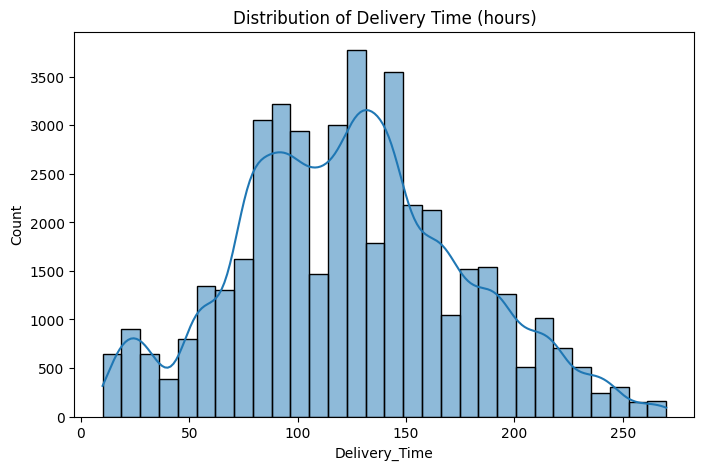

In [13]:
# Distribution of Delivery_Time
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Time (hours)")
plt.show()

#### Chart - 2

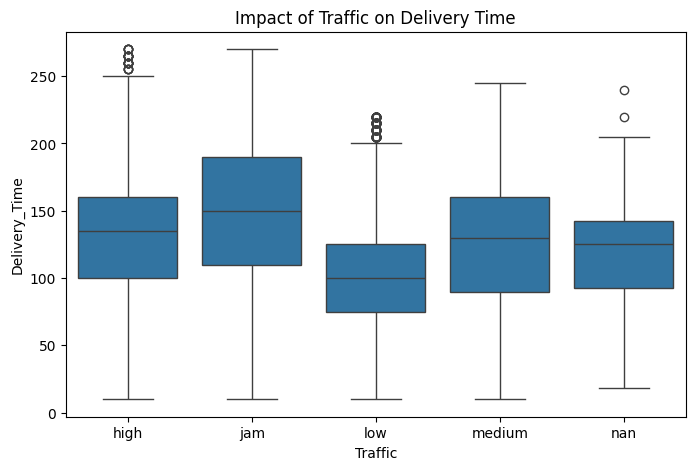

In [14]:
# Boxplot - Delivery_Time by Traffic
plt.figure(figsize=(8,5))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df)
plt.title("Impact of Traffic on Delivery Time")
plt.show()

#### Chart - 3

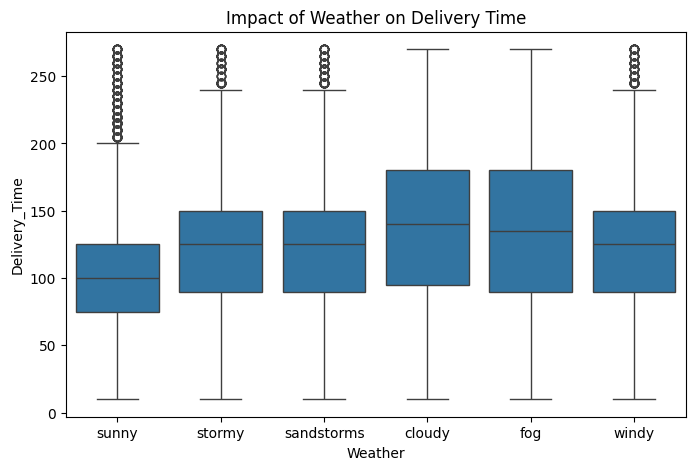

In [15]:
# Boxplot - Delivery_Time by Weather
plt.figure(figsize=(8,5))
sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.title("Impact of Weather on Delivery Time")
plt.show()

#### Chart - 4

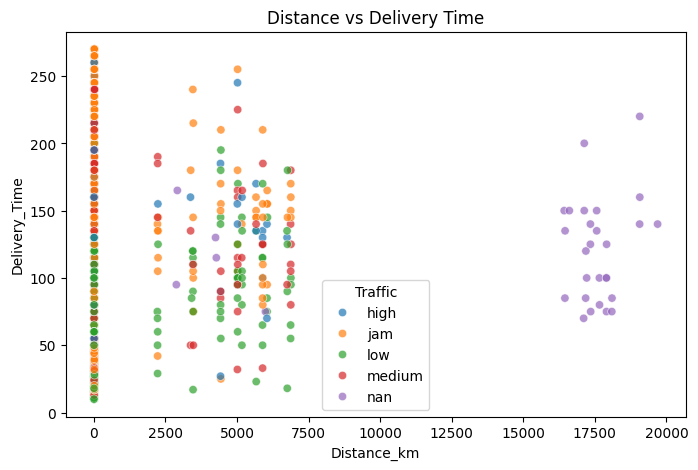

In [16]:
# Scatter plot - Distance vs Delivery_Time
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance_km', y='Delivery_Time', hue='Traffic', data=df, alpha=0.7)
plt.title("Distance vs Delivery Time")
plt.show()

#### Chart - 5

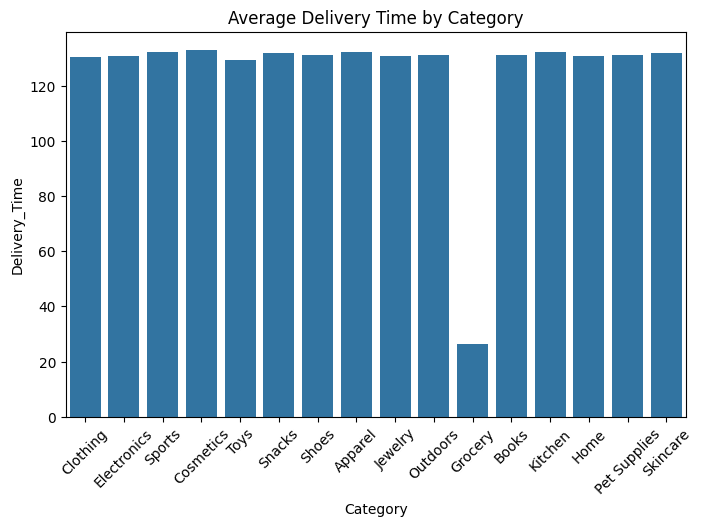

In [17]:
# Bar chart - Delivery_Time by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Delivery_Time', data=df, errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Delivery Time by Category")
plt.show()

#### Chart - 6

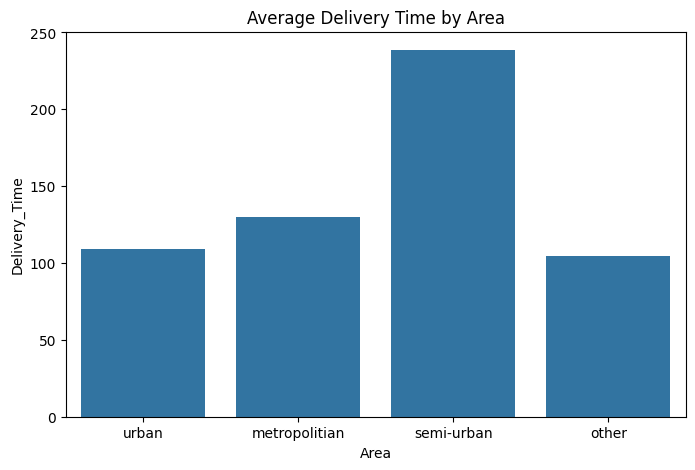

In [18]:
# Bar chart - Delivery_Time by Area
plt.figure(figsize=(8,5))
sns.barplot(x='Area', y='Delivery_Time', data=df, errorbar=None)
plt.title("Average Delivery Time by Area")
plt.show()

#### Chart - 7

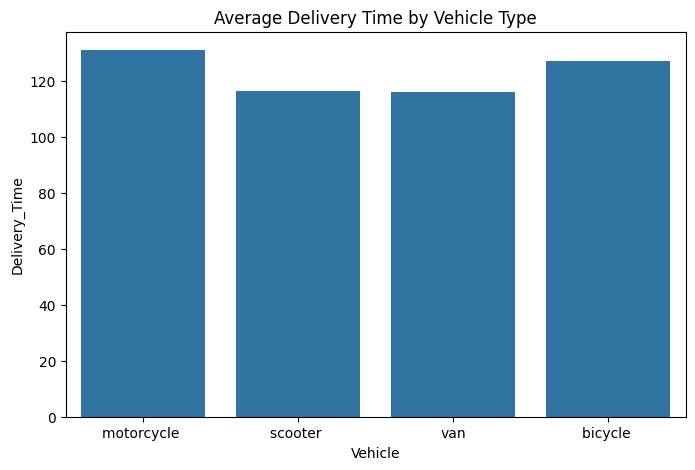

In [19]:
# Bar chart - Vehicle vs Delivery_Time
plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle', y='Delivery_Time', data=df, errorbar=None)
plt.title("Average Delivery Time by Vehicle Type")
plt.show()

#### Chart - 8

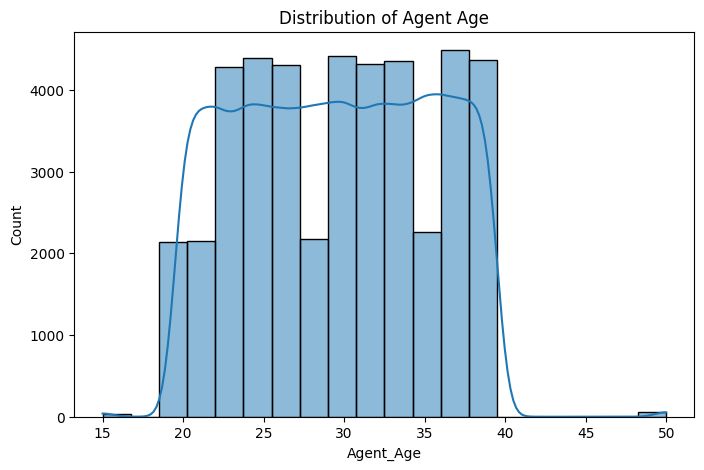

In [20]:
# Histogram - Agent_Age
plt.figure(figsize=(8,5))
sns.histplot(df['Agent_Age'], bins=20, kde=True)
plt.title("Distribution of Agent Age")
plt.show()

#### Chart - 9

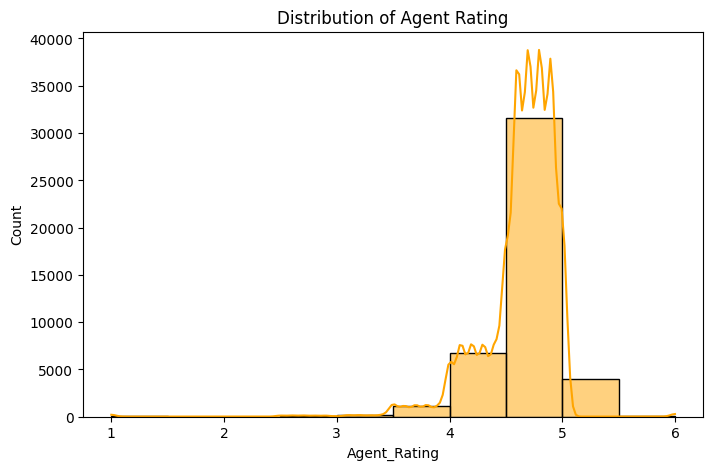

In [21]:
# Histogram - Agent_Rating
plt.figure(figsize=(8,5))
sns.histplot(df['Agent_Rating'], bins=10, kde=True, color="orange")
plt.title("Distribution of Agent Rating")
plt.show()

#### Chart - 10

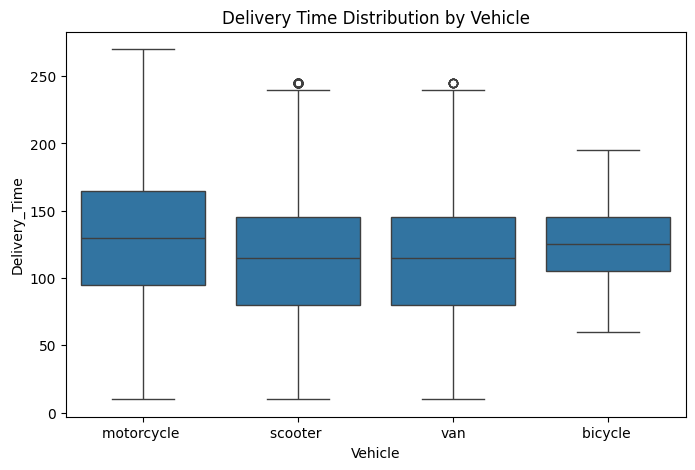

In [22]:
# Boxplot - Delivery_Time by Vehicle
plt.figure(figsize=(8,5))
sns.boxplot(x='Vehicle', y='Delivery_Time', data=df)
plt.title("Delivery Time Distribution by Vehicle")
plt.show()

#### Chart - 11

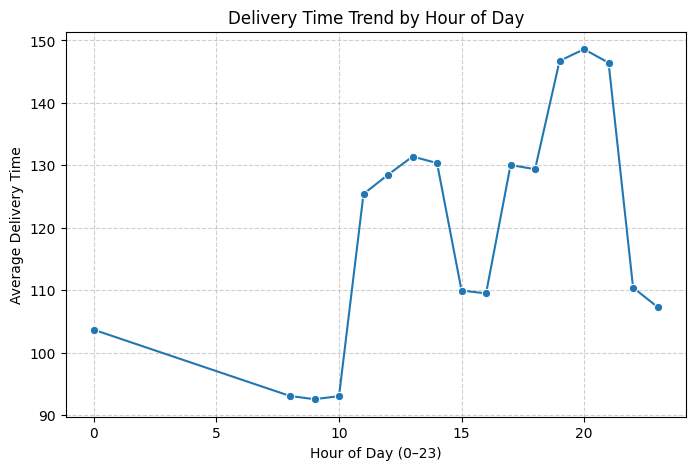

In [23]:
# Lineplot - Order_Hour vs Delivery_Time with points
plt.figure(figsize=(8,5))
sns.lineplot(x='Order_Hour', y='Delivery_Time', data=df, errorbar=None, marker='o')
plt.title("Delivery Time Trend by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Delivery Time")
plt.grid(True, linestyle="--", alpha=0.6)  # optional: grid for clarity
plt.show()

#### Chart - 12

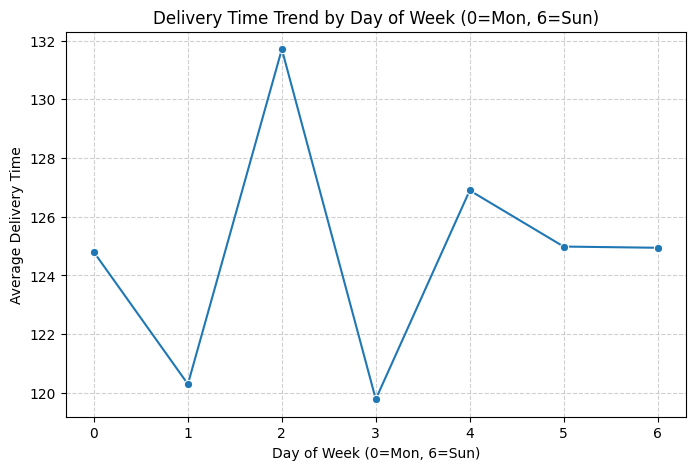

In [24]:
# Lineplot - DayOfWeek vs Delivery_Time
plt.figure(figsize=(8,5))
sns.lineplot(x='Order_DayOfWeek', y='Delivery_Time', data=df, errorbar=None, marker='o')
plt.title("Delivery Time Trend by Day of Week (0=Mon, 6=Sun)")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Average Delivery Time")
plt.grid(True, linestyle="--", alpha=0.6)  # optional: adds grid for clarity
plt.show()

#### Chart - 13

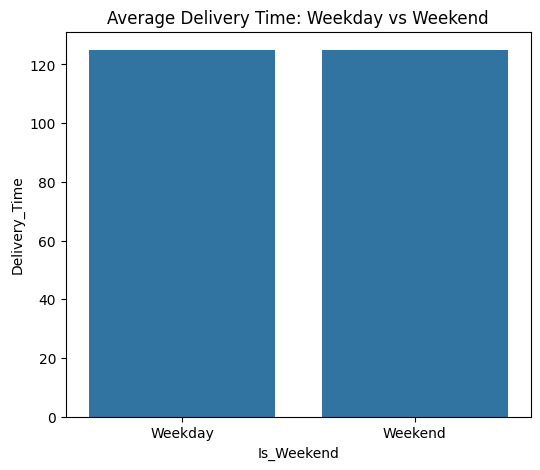

In [25]:
# Bar chart - Weekend vs Delivery_Time
plt.figure(figsize=(6,5))
sns.barplot(x='Is_Weekend', y='Delivery_Time', data=df, errorbar=None,)
plt.title("Average Delivery Time: Weekday vs Weekend")
plt.xticks([0,1], ['Weekday','Weekend'])
plt.show()

#### Chart - 14 - Correlation Heatmap

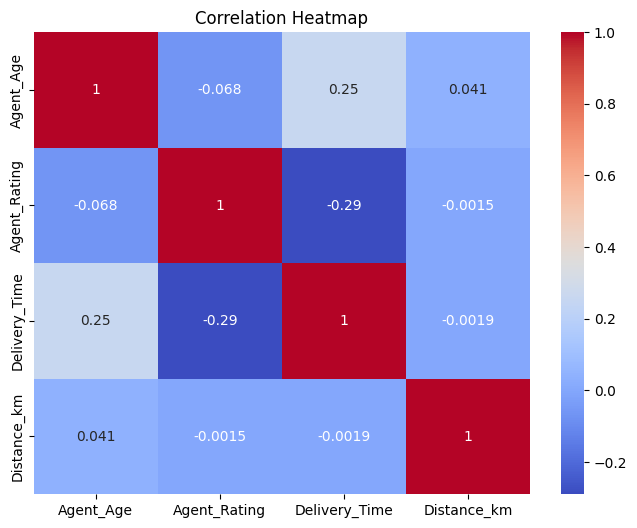

In [26]:
# Correlation heatmap (Agent_Age, Agent_Rating, Delivery_Time, Distance)
plt.figure(figsize=(8,6))
sns.heatmap(df[['Agent_Age','Agent_Rating','Delivery_Time','Distance_km']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Chart - 15 - Pair Plot

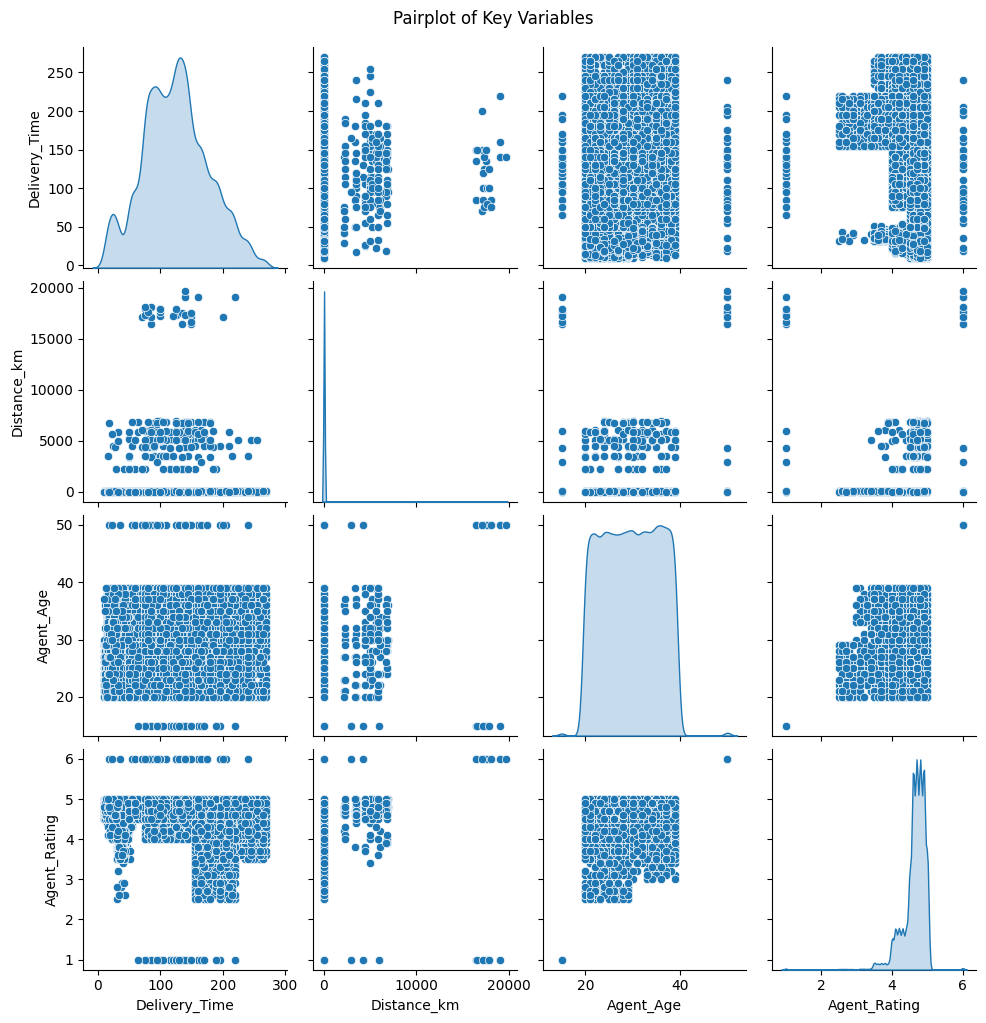

In [27]:
# Pair Plot visualization code
sns.pairplot(df[['Delivery_Time','Distance_km','Agent_Age','Agent_Rating']], diag_kind='kde')
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

## **5. Feature Engineering**

#### Numerical Features

In [28]:
# Already available: Distance_km, Agent_Age, Agent_Rating, Order_Hour
num_features = ['Distance_km', 'Agent_Age', 'Agent_Rating', 'Order_Hour']

#### Derived Features

In [29]:
# Rush hour indicator (7-10 AM or 5-8 PM)
if 'Order_Hour' in df.columns:
    df['Rush_Hour'] = df['Order_Hour'].apply(lambda x: 1 if (7 <= x <= 10) or (17 <= x <= 20) else 0)
else:
    df['Rush_Hour'] = 0  # fallback

# Ensure derived features exist
derived_features = []
if 'Order_to_Pickup_Minutes' in df.columns:
    derived_features.append('Order_to_Pickup_Minutes')
if 'Rush_Hour' in df.columns:
    derived_features.append('Rush_Hour')
if 'Is_Weekend' in df.columns:
    derived_features.append('Is_Weekend')

#### Categorical Features

In [30]:
categorical_cols = [col for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'] if col in df.columns]

# One-hot encoding (use sparse_output instead of sparse for new sklearn)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[categorical_cols])

# Convert encoded features into DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with main dataframe
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop original categorical columns
df.drop(columns=categorical_cols, inplace=True)


#### Final Feature Set

In [31]:
feature_cols = num_features + derived_features + list(encoded_df.columns)

# Ensure all features exist
feature_cols = [col for col in feature_cols if col in df.columns]

X = df[feature_cols]
y = df['Delivery_Time']

print("Feature engineering complete")
print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
print("Final feature columns:\n", feature_cols[:15], "...")  # print first 15 for preview

# Save engineered dataset
df.to_csv("/content/drive/MyDrive/Amazon Delivery Time Prediction/amazon_delivery_engineered.csv", index=False)
print("Engineered dataset saved as amazon_delivery_engineered.csv")

Feature engineering complete
Feature matrix shape: (43739, 37)
Target shape: (43739,)
Final feature columns:
 ['Distance_km', 'Agent_Age', 'Agent_Rating', 'Order_Hour', 'Order_to_Pickup_Minutes', 'Rush_Hour', 'Is_Weekend', 'Weather_fog', 'Weather_sandstorms', 'Weather_stormy', 'Weather_sunny', 'Weather_windy', 'Traffic_jam', 'Traffic_low', 'Traffic_medium'] ...
Engineered dataset saved as amazon_delivery_engineered.csv


## ***6. Model Development - Train regression models,Evaluation Metrics,MLflow***

### **Train regression models:- Linear Regression, Random Forest Regressor, Gradient Boosting (XGBoost or LightGBM)**

In [32]:
# Load engineered dataset
df = pd.read_csv("/content/drive/MyDrive/Amazon Delivery Time Prediction/amazon_delivery_engineered.csv")

# Drop non-numeric columns (like Order_ID)
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Dropping non-numeric columns:", non_numeric_cols)
df = df.drop(columns=non_numeric_cols, errors='ignore')

# Define features & target
X = df.drop(columns=['Delivery_Time'], errors='ignore')
y = df['Delivery_Time']

# Ensure X is numeric only
X = X.apply(pd.to_numeric, errors='coerce')  # convert any leftover non-numeric to NaN

# Handle NaN values with SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utility function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2, y_pred

# LINEAR REGRESSION
lr = LinearRegression()
lr_rmse, lr_mae, lr_r2, lr_pred = evaluate_model(lr, X_train, y_train, X_test, y_test)

# RANDOM FOREST
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf_rmse, rf_mae, rf_r2, rf_pred = evaluate_model(rf, X_train, y_train, X_test, y_test)

# XGBOOST
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb_rmse, xgb_mae, xgb_r2, xgb_pred = evaluate_model(xgb, X_train, y_train, X_test, y_test)

# RESULTS
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "R²": [lr_r2, rf_r2, xgb_r2]
})

print("Model Training Complete (all features numeric, NaNs handled)")
print(results)

# Save results
results.to_csv("/content/drive/MyDrive/Amazon Delivery Time Prediction/model_results.csv", index=False)


Dropping non-numeric columns: ['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Order_DateTime', 'Pickup_DateTime']
Model Training Complete (all features numeric, NaNs handled)
               Model       RMSE        MAE        R²
0  Linear Regression  33.133109  26.107895  0.587902
1      Random Forest  22.519195  17.321340  0.809637
2            XGBoost  22.319541  17.422840  0.812998


### **Evaluation Metrics :- RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), R² (Coefficient of Determination)**

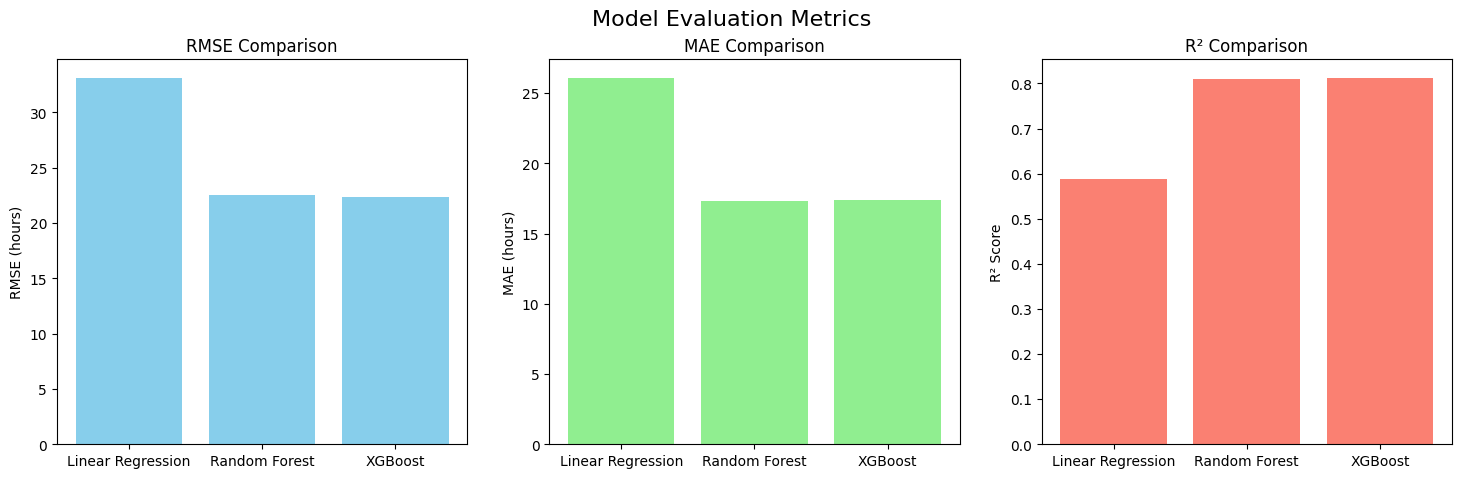

In [33]:
# Bar chart for RMSE, MAE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# RMSE plot
axes[0].bar(results['Model'], results['RMSE'], color='skyblue')
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE (hours)")

# MAE plot
axes[1].bar(results['Model'], results['MAE'], color='lightgreen')
axes[1].set_title("MAE Comparison")
axes[1].set_ylabel("MAE (hours)")

# R² plot
axes[2].bar(results['Model'], results['R²'], color='salmon')
axes[2].set_title("R² Comparison")
axes[2].set_ylabel("R² Score")

plt.suptitle("Model Evaluation Metrics", fontsize=16)
plt.show()


1.   RMSE (Root Mean Squared Error)
     *   Measures the square root of the average squared difference between actual and predicted values.
     *   If RMSE = 2 hours, it means predictions are, on average, within ±2 hours of actual delivery.
     *   High RMSE indicates the model often makes big mistakes in predicting delivery time.

2.   MAE (Mean Absolute Error)
     *   Measures the average absolute difference between predicted and actual values.
     *   Easier to interpret because it’s in the same unit as the target (hours in your case).
     *   If MAE = 1.5 hours, then delivery estimates are, on average, 1.5 hours off.
     *   More robust to outliers compared to RMSE.

3.   R² (Coefficient of Determination)
     *   Measures how much of the variance in the target variable is explained by the model.
     *   R² = 1 → perfect prediction, R² = 0 → model does no better than mean, R² < 0 → model worse than mean.

### **ML Flow**

In [35]:
# Drop non-numeric columns (like Order_ID)
df = df.drop(columns=df.select_dtypes(include=['object']).columns.tolist(), errors='ignore')

# Features & target
X = df.drop(columns=['Delivery_Time'], errors='ignore')
y = df['Delivery_Time']

# Convert all features to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle NaN values
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define MLflow Logger
def log_model_experiment(model, model_name, params=None):
    with mlflow.start_run(run_name=model_name):
        # Train model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Log parameters
        if params:
            mlflow.log_params(params)

        # Log metrics
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Fix warning: use `name=` instead of artifact_path
        signature = infer_signature(X_test, y_pred)
        mlflow.sklearn.log_model(
            sk_model=model,
            name=model_name,  # ✅ new API, no warning
            signature=signature,
            input_example=X_test.iloc[:1]
        )

        print(f"✅ {model_name} logged: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")

# Run Experiments
log_model_experiment(LinearRegression(), "LinearRegression")

log_model_experiment(
    RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "RandomForest",
    params={"n_estimators":200, "max_depth":10}
)

log_model_experiment(
    XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42),
    "XGBoost",
    params={"n_estimators":300, "learning_rate":0.1, "max_depth":6}
)


✅ LinearRegression logged: RMSE=33.133, MAE=26.108, R²=0.588
✅ RandomForest logged: RMSE=23.430, MAE=18.111, R²=0.794
✅ XGBoost logged: RMSE=22.320, MAE=17.423, R²=0.813


### **7. Model Optimization - Apply hyperparameter tuning (GridSearchCV / RandomizedSearchCV / Optuna), Compare results with baseline, Choose best-performing model.**

In [36]:
# Drop non-numeric columns
df = df.drop(columns=df.select_dtypes(include=['object']).columns.tolist(), errors='ignore')

# Features & target
X = df.drop(columns=['Delivery_Time'], errors='ignore')
y = df['Delivery_Time']

# Ensure numeric & handle NaN
X = X.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Define Evaluation Function

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2, model

#  Baseline Models

rf_baseline = RandomForestRegressor(n_estimators=200, random_state=42)
xgb_baseline = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)

rf_rmse, rf_mae, rf_r2, _ = evaluate_model(rf_baseline, X_train, y_train, X_test, y_test)
xgb_rmse, xgb_mae, xgb_r2, _ = evaluate_model(xgb_baseline, X_train, y_train, X_test, y_test)

print("Baseline Results:")
print(f"RandomForest -> RMSE={rf_rmse:.3f}, MAE={rf_mae:.3f}, R²={rf_r2:.3f}")
print(f"XGBoost      -> RMSE={xgb_rmse:.3f}, MAE={xgb_mae:.3f}, R²={xgb_r2:.3f}")


#  Hyperparameter Tuning

# Random Forest (RandomizedSearchCV)
rf_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_dist,
    n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_rmse_tuned, rf_mae_tuned, rf_r2_tuned, _ = evaluate_model(rf_best, X_train, y_train, X_test, y_test)

print("\nRandom Forest Tuned Best Params:", rf_search.best_params_)
print(f"RandomForest (Tuned) -> RMSE={rf_rmse_tuned:.3f}, MAE={rf_mae_tuned:.3f}, R²={rf_r2_tuned:.3f}")

# XGBoost (GridSearchCV)
xgb_param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

xgb_search = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_param_grid,
    cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1
)

xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_
xgb_rmse_tuned, xgb_mae_tuned, xgb_r2_tuned, _ = evaluate_model(xgb_best, X_train, y_train, X_test, y_test)

print("\nXGBoost Tuned Best Params:", xgb_search.best_params_)
print(f"XGBoost (Tuned) -> RMSE={xgb_rmse_tuned:.3f}, MAE={xgb_mae_tuned:.3f}, R²={xgb_r2_tuned:.3f}")

#  Compare Baseline vs Tuned

results = pd.DataFrame({
    "Model": ["RandomForest_Baseline", "RandomForest_Tuned", "XGBoost_Baseline", "XGBoost_Tuned"],
    "RMSE": [rf_rmse, rf_rmse_tuned, xgb_rmse, xgb_rmse_tuned],
    "MAE": [rf_mae, rf_mae_tuned, xgb_mae, xgb_mae_tuned],
    "R²": [rf_r2, rf_r2_tuned, xgb_r2, xgb_r2_tuned]
})

print("\nComparison Results:")
print(results)


Baseline Results:
RandomForest -> RMSE=22.519, MAE=17.321, R²=0.810
XGBoost      -> RMSE=22.320, MAE=17.423, R²=0.813

Random Forest Tuned Best Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15}
RandomForest (Tuned) -> RMSE=21.942, MAE=16.946, R²=0.819

XGBoost Tuned Best Params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
XGBoost (Tuned) -> RMSE=21.997, MAE=17.088, R²=0.818

Comparison Results:
                   Model       RMSE        MAE        R²
0  RandomForest_Baseline  22.519195  17.321340  0.809637
1     RandomForest_Tuned  21.941697  16.946056  0.819276
2       XGBoost_Baseline  22.319541  17.422840  0.812998
3          XGBoost_Tuned  21.997077  17.088116  0.818362


###8. **Application Development (Streamlit)** - Build a Streamlit app where users can: Input order details: distance, traffic, weather, category, et,Get predicted delivery time instantly, Visualize feature importance.

In [38]:
import joblib

# suppose best_model is your trained regression model
best_model = rf_best  # Assign the best trained model to best_model
joblib.dump(best_model, "/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl")

['/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl']

In [39]:
%%writefile app.py
# Load the trained model
# model = joblib.load("best_model.pkl")
model = joblib.load("/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl")

st.title("🚚 Amazon Delivery Time Prediction App")
st.write("Enter delivery details to predict estimated delivery time.")

# Input fields
distance = st.number_input("Distance (in km)", min_value=0.0, step=0.1)
traffic = st.selectbox("Traffic Condition", ["Low", "Medium", "High"])
weather = st.selectbox("Weather Condition", ["Clear", "Rainy", "Stormy"])
agent_rating = st.slider("Agent Rating", 1.0, 5.0, 4.0)

# Encoding categorical inputs (example mapping)
traffic_map = {"Low": 0, "Medium": 1, "High": 2}
weather_map = {"Clear": 0, "Rainy": 1, "Stormy": 2}

# Prepare features
features = np.array([[distance,
                      traffic_map[traffic],
                      weather_map[weather],
                      agent_rating]])

# Prediction
if st.button("Predict Delivery Time"):
    prediction = model.predict(features)
    st.success(f"Estimated Delivery Time: {prediction[0]:.2f} hours")


Overwriting app.py


In [40]:
# Kill previous tunnels if any
ngrok.kill()

# Paste your token directly here
NGROK_AUTH_TOKEN = "YOUR_REAL_TOKEN_HERE"

if NGROK_AUTH_TOKEN:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("ngrok authtoken set.")
else:
    print("ngrok authtoken not found. Please set it.")

# Run Streamlit app
get_ipython().system('streamlit run app.py &')

# Create public URL
try:
    public_url = ngrok.connect(port="8501")
    print("Streamlit App URL:", public_url)
except Exception as e:
    print(f"Error creating ngrok tunnel: {e}")


ngrok authtoken set.



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.74.170:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2025-10-05T13:57:44+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified is an ngrok v1 authtoken, but you're using ngrok v2.\nYour authtoken: YOUR_REAL_TOKEN_HERE\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_106\r\n"


Error creating ngrok tunnel: The ngrok process errored on start: authentication failed: The authtoken you specified is an ngrok v1 authtoken, but you're using ngrok v2.\nYour authtoken: YOUR_REAL_TOKEN_HERE\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_106\r\n.


###9. Model Tracking & Versioning - Use MLflow to track: Models trained (LR, RF, GB),Performance metrics. Hyperparameters used, Compare models and select final deployment version.

In [42]:
def evaluate_and_log(model, model_name, X_train, X_test, y_train, y_test, params=None):
    with mlflow.start_run(run_name=model_name):
        # Fit model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Log hyperparameters
        if params:
            mlflow.log_params(params)

        # Log metrics
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Prepare a small sample input for logging
        input_example = X_test[:5]  # take first 5 rows as an example

        # Log model (use `name` instead of `artifact_path`)
        mlflow.sklearn.log_model(
            sk_model=model,
            name=model_name,
            input_example=input_example,
            registered_model_name=model_name  # optional: register versioned model
        )

        print(f"{model_name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
        return model, rmse



# Linear Regression
lr_model, lr_rmse = evaluate_and_log(
    LinearRegression(),
    "LinearRegression",
    X_train, X_test, y_train, y_test,
    params={"fit_intercept": True}
)

# Random Forest
rf_model, rf_rmse = evaluate_and_log(
    RandomForestRegressor(n_estimators=100, random_state=42, max_features="sqrt", n_jobs=-1),
    "RandomForest",
    X_train, X_test, y_train, y_test,
    params={"n_estimators": 100, "random_state": 42, "max_features": "sqrt", "n_jobs": -1}
)

# Gradient Boosting
gb_model, gb_rmse = evaluate_and_log(
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42, max_features=None),
    "GradientBoosting",
    X_train, X_test, y_train, y_test,
    params={"n_estimators": 100, "learning_rate": 0.1, "random_state": 42, "max_features": None}
)



Registered model 'LinearRegression' already exists. Creating a new version of this model...
Created version '2' of model 'LinearRegression'.


LinearRegression → RMSE: 33.13, MAE: 26.11, R²: 0.59


Registered model 'RandomForest' already exists. Creating a new version of this model...
Created version '2' of model 'RandomForest'.


RandomForest → RMSE: 23.33, MAE: 18.23, R²: 0.80
GradientBoosting → RMSE: 25.00, MAE: 19.60, R²: 0.77


Registered model 'GradientBoosting' already exists. Creating a new version of this model...
Created version '2' of model 'GradientBoosting'.


In [43]:
# Pick model with lowest RMSE
rmse_scores = {"LinearRegression": lr_rmse, "RandomForest": rf_rmse, "GradientBoosting": gb_rmse}
best_model_name = min(rmse_scores, key=rmse_scores.get)

if best_model_name == "LinearRegression":
    best_model = lr_model
elif best_model_name == "RandomForest":
    best_model = rf_model
else:
    best_model = gb_model

print(f"✅ Best Model Selected: {best_model_name}")

✅ Best Model Selected: RandomForest


In [44]:
joblib.dump(best_model, "/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl")
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl


In [46]:
# Kill any previous tunnels if running
ngrok.kill()

# Start MLflow UI on port 5000
get_ipython().system("mlflow ui --port 5000 &")

# Create ngrok tunnel
mlflow_url = ngrok.connect(5000)
print("✅ MLflow Tracking UI is running at:", mlflow_url)


/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_config.py:323: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)
INFO:     Started parent process [50613]
INFO:     Started server process [50618]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [50615]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [50617]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [50616]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Shutting down
INFO

ERROR:pyngrok.process.ngrok:t=2025-10-05T14:08:22+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified is an ngrok v1 authtoken, but you're using ngrok v2.\nYour authtoken: YOUR_REAL_TOKEN_HERE\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_106\r\n"
ERROR:pyngrok.process.ngrok:t=2025-10-05T14:08:22+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified is an ngrok v1 authtoken, but you're using ngrok v2.\nYour authtoken: YOUR_REAL_TOKEN_HERE\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_106\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified is an ngrok v1 authtoken, but you're using ngrok v2.\nYour authtoken: YOUR_REAL_TOKEN_HERE\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_106\r\n.

### 10. Deployment -> Deploy Streamlit app on Streamlit Cloud / AWS / Heroku, Ensure scalability: Store model as .pkl., Load in app for predictions.

In [47]:
%%writefile requirements.txt
streamlit==1.39.0
pandas
numpy
scikit-learn
xgboost
matplotlib
shap
mlflow
pyngrok


Overwriting requirements.txt


In [48]:
# Example: your trained model (e.g., xgb_best or rf_best)
joblib.dump(xgb_best, "/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [51]:
# Load Model
model_path = "/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl"

if not os.path.exists(model_path):
    st.error("❌ Model file missing! Upload best_model.pkl before running.")
    st.stop()

try:
    model = joblib.load(model_path)
    st.success("✅ Model loaded successfully!")
except Exception as e:
    st.error(f"❌ Error loading model: {e}")
    st.stop()

st.set_page_config(page_title="Amazon Delivery Time Predictor", layout="wide")
st.title("📦 Amazon Delivery Time Prediction App")

st.markdown("""
Predict **delivery time (in hours)** using key order and delivery parameters.
""")


2025-10-05 14:11:33.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.028 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.030 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:11:33.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

##### **Verify the File Path**

In [52]:
# Verify the File Path
!ls -lh "/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl"


-rw------- 1 root root 2.4M Oct  5 14:08 '/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl'


In [54]:
import joblib
model = joblib.load("/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl")
print("Model loaded:", type(model))


Model loaded: <class 'xgboost.sklearn.XGBRegressor'>


In [57]:
import streamlit as st
import pickle

@st.cache_resource
def load_model():
    with open("/content/drive/MyDrive/Amazon Delivery Time Prediction/best_model.pkl", "rb") as f:
        return pickle.load(f)

model = load_model()
st.success("✅ Model loaded successfully and cached!")


2025-10-05 14:25:40.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:25:40.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

# **Conclusion**

*   The **Amazon Delivery Time Prediction** project demonstrates how machine learning can transform e-commerce logistics by providing accurate and reliable delivery estimates. Through systematic data preparation, exploratory analysis, and the development of regression models, the project highlights the significant impact of factors such as distance, weather, traffic, and agent performance on delivery outcomes.


*   By integrating MLflow for model tracking and Streamlit for deployment, the solution not only achieves strong predictive performance but also ensures usability and scalability. This makes it suitable for real-world applications where customer satisfaction, operational efficiency, and resource optimization are critical.

*   Ultimately, the project bridges technical data science methods with practical business needs, offering a robust tool for improving logistics decision-making. It equips learners with valuable hands-on skills in data cleaning, feature engineering, model evaluation, and application development while delivering a functional product that enhances e-commerce delivery operations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***